# Wrangle and Data analysis project

In [1]:
# importing needed lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests
import re
import json
import os
import datetime
from timeit import default_timer as timer
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

## 1.Gathering data

#### Downloading data programmatically

In [3]:
# downloading `twitter-archive-enhanced.csv` from url 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv?web=1'
filename = 'twitter-archive-enhanced.csv'
response = requests.get(url)
if not os.path.isfile(filename):
    with open(filename, mode='wb') as file:
        file.write(response.content)

In [27]:
# downloading `image_predictions.tsv`
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(filename):
    with open(filename, mode='wb') as file:
        file.write(response.content)

In [2]:
# reading files into dataFrame
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")
Image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

#### Reading twitter API

In [43]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [45]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Rate limit reached. Sleeping for: 252
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384

Success
261: 842892208864923648
Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 727
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Succe

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [46]:
print('Number of tweets: {}'.format(len(list_of_tweets)))
print('Number of errors: {}'.format(len(error_tweets)))

Number of tweets: 2331
Number of errors: 25


In [3]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'followers_count': user_count})
api_df = pd.DataFrame(df_list)

## 2. Assesing data

#### 2.1 Visual Assesing

In [4]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [5]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
api_df

,favorite_count,followers_count,retweet_count,tweet_id
0,35095,8960764,7386,892420643555336193
1,30383,8960764,5501,892177421306343426
2,22846,8960764,3635,891815181378084864
3,38368,8960764,7563,891689557279858688
4,36640,8960764,8147,891327558926688256
5,18482,8960764,2731,891087950875897856
6,10745,8960764,1766,890971913173991426
7,59097,8960764,16536,890729181411237888
8,25426,8960764,3784,890609185150312448
9,29016,8960764,6410,890240255349198849


#### 2.2 Programatic assisment

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count     2331 non-null int64
followers_count    2331 non-null int64
retweet_count      2331 non-null int64
tweet_id           2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [9]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
api_df.describe()

,favorite_count,followers_count,retweet_count,tweet_id
count,2331.000000,2.331000e+03,2331.000000,2.331000e+03
mean,7328.981124,8.960779e+06,2596.562849,7.419079e+17
std,11382.279054,4.572299e+01,4392.567263,6.823170e+16
min,0.000000,8.960764e+06,1.000000,6.660209e+17
25%,1272.500000,8.960764e+06,527.000000,6.782670e+17
50%,3183.000000,8.960776e+06,1211.000000,7.182469e+17
75%,8959.000000,8.960778e+06,3009.000000,7.986692e+17
max,150928.000000,8.961290e+06,74541.000000,8.924206e+17


In [12]:
# checking count of missing dog names
archive_df.name[archive_df.name=='None'].count()

745

In [13]:
print("Number of original tweets is: {}".format(archive_df.retweeted_status_id.isnull().sum()))

Number of original tweets is: 2175


In [14]:
list(archive_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [15]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

##### inaccurate numerator rating values (420,80,165,84,88,165,182,666,960,1776,99,121,204,etc..)

In [16]:
archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

##### inaccurrate denominator ratings represented in some rating greater or less than 10

In [17]:
archive_df.name.value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Cooper      11 
Oliver      11 
Penny       10 
Lola        10 
Tucker      10 
Bo          9  
Winston     9  
Sadie       8  
the         8  
Toby        7  
Buddy       7  
Bailey      7  
Daisy       7  
an          7  
Milo        6  
Rusty       6  
Oscar       6  
Leo         6  
Scout       6  
Koda        6  
Bella       6  
Jax         6  
Jack        6  
Stanley     6  
Dave        6  
George      5  
           ..  
Karl        1  
Siba        1  
Cannon      1  
Stark       1  
Striker     1  
Brownie     1  
Gòrdón      1  
Swagger     1  
Julio       1  
Hanz        1  
Noah        1  
Zeek        1  
Taco        1  
Mairi       1  
Dudley      1  
Devón       1  
Joshwa      1  
Snicku      1  
Rufio       1  
Kial        1  
Margo       1  
Einstein    1  
Jockson     1  
Pippin      1  
Claude      1  
Al          1  
Nigel       1  
Beya        1  
Pupcasso    1  
Dallas      1  
Name: name, Length: 957,

In [18]:
Image_predictions_df.jpg_url.isnull().sum()

0

In [19]:
# checking for duplicated images
Image_predictions_df.jpg_url.duplicated().sum()

66

In [6]:
#checking for most predicted breed from p1
Image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
Eskimo_dog                   18 
Maltese_dog                  18 
Shetland_sheepdog            18 
beagle                       18 
teddy                        18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
kuvasz                       16 
Italian_greyhound            16 
          

In [41]:
# getting the accuracy of each algorithm
print(Image_predictions_df.p1_dog.mean())
print(Image_predictions_df.p2_dog.mean()) 
print(Image_predictions_df.p3_dog.mean())

0.738313253012
0.74843373494
0.722409638554


In [49]:
# checking for duplicate tweets
print(archive_df.tweet_id.duplicated().sum())
print(api_df.tweet_id.duplicated().sum())
print(Image_predictions_df.tweet_id.duplicated().sum())

0
0
0


## Assesment Summary

## Quality issues:
a.`archive_df`:
- in_reply_to_status_id is float and not required
- in_reply_to_user_id is float and not required
- timestamp is string
- retweeted_status_id is float and not required
- retweeted_status_user_id is float and not required
- retweeted_status_timestamp is string not required
- Not avilable has more than one representation (NaN, None)
- Missing dog names in 745 records showed as None
- Some records are retweets so they don't conform to the schema
- dog names have some in accurate names (a, an, etc)
- missing classification for most of the rows
- rating_numerator and rating_denominator are should be float not int
- inaccurate data in numerator and denominator rating values

b. `api_df`:
- tweet_id should be string(object) not float or int to exclude from 5 number summary

c. `Image_predictions_df`:
- tweet_id is int instead of string

## Tidinies issues:
- `archive_df` values are column name ('doggo', 'floofer', 'pupper', 'puppo')
- `api_df` unit retweet_count , favourite_count & followers_count should be in `archive_df`

# 2- Cleaning

In [4]:
# copy data into new df
archive_clean = archive_df.copy()
Image_predictions_clean = Image_predictions_df.copy()
api_clean = api_df.copy()

In [5]:
print(archive_clean.shape == archive_df.shape)
print(Image_predictions_clean.shape == Image_predictions_df.shape)
print(api_clean.shape == api_df.shape)

True
True
True


### Define
- `archife_clean` remove retweets and replys records from df by getting records  which retweeted_status_id or in_reply_to_status_id are null

### Code

In [6]:
# remove replied tweets
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [102]:
archive_clean.in_reply_to_status_id.isnull().sum()

2278

In [103]:
# number of tweets that are retweets
archive_clean.retweeted_status_id.notnull().sum()

181

In [104]:
# remove retweets
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean.shape

(2097, 17)

### Test

In [105]:
print(archive_clean.retweeted_status_id.notnull().sum())
print(archive_clean.in_reply_to_status_id.notnull().sum())

0
0


### Define

- `archive_clean` Drop columns [in_reply_to_status_id, retweeted_status_id, in_reply_to_user_id, retweeted_status_user_id] 

### Code

In [7]:
# drop columns in list 
drop_col = ['in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id','retweeted_status_timestamp'] 
for col in drop_col :
    archive_clean.drop(columns=col, inplace=True)

### Test

In [8]:
print(drop_col not in list(archive_clean.columns))
archive_clean.head(1)

True


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


### Define
- `archive_clean` Change timestamp type to datetime 

### Code

In [9]:
archive_clean.timestamp =  pd.to_datetime(archive_clean.timestamp).dt.normalize()
archive_clean.timestamp.sample()

1917   2015-12-08
Name: timestamp, dtype: datetime64[ns]

### Test

In [109]:
archive_clean.timestamp.dtype

dtype('<M8[ns]')

### Define
- `archive_clean` change tweet_id datatype to string

### Code

In [10]:
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')

### Test

In [111]:
archive_clean.tweet_id.dtype

dtype('O')

### Define 
- `archive_clean` Fix inconsistency in missing data by changing all None values to NaN

### Code

In [11]:
archive_clean.replace('None',np.nan, inplace=True)

### Test

In [113]:
archive_clean[archive_clean.name == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define 
- `api_clean` change `tweet_id` from int to string

### Code

In [12]:
api_clean.tweet_id = api_clean.tweet_id.astype('str')

### Test

In [115]:
api_clean.tweet_id.dtype

dtype('O')

### Define
- `Image_predictions_clean` change `tweet_id` to string instead of int

### Code

In [13]:
Image_predictions_clean.tweet_id = Image_predictions_clean.tweet_id.astype('str')

### Test

In [117]:
Image_predictions_clean.tweet_id.dtype

dtype('O')

### Define 
- fix the tidness issue of values used as column headers in ('doggo', 'floofer', 'pupper', 'puppo')

### Code

In [14]:
archive_clean.iloc[:, -4:  ] = archive_clean.iloc[:, -4:  ].replace(np.nan,'')
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.dog_stage.replace('',np.nan, inplace=True)
archive_clean.dog_stage.value_counts()

pupper          242
doggo           80 
puppo           28 
doggopupper     11 
floofer         9  
doggofloofer    1  
doggopuppo      1  
Name: dog_stage, dtype: int64

In [16]:
# separate combined stages like doggopuppo with ","
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'

In [17]:
drop_cols = ['doggo', 'floofer', 'pupper', 'puppo']
for col in drop_cols:
    archive_clean.drop(col, inplace=True, axis=1)

### Test

In [18]:
archive_clean.dog_stage.value_counts(dropna=False)

NaN              1906
pupper           242 
doggo            80  
puppo            28  
doggo,pupper     11  
floofer          9   
doggo,floofer    1   
doggo,puppo      1   
Name: dog_stage, dtype: int64

### Define 
- remove the tweets with no images from `archive_clean`

### Code

In [19]:
tweets_id = Image_predictions_clean.tweet_id
tweets_id = list(tweets_id)
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_id)]

### Test

In [20]:
archive_clean.shape

(2052, 9)

### Define
- Change rating_numerator and rating_denominator should be float

### Code

In [21]:
archive_clean.rating_numerator = archive_clean.rating_numerator.astype('float')
archive_clean.rating_denominator = archive_clean.rating_denominator.astype('float')

### Test

In [124]:
print(archive_clean.rating_numerator.dtype)
print(archive_clean.rating_denominator.dtype)

float64
float64


In [22]:
archive_clean[archive_clean.rating_numerator < 6 ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10.0,Bella,NaN
315,835152434251116546,2017-02-24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,NaN,NaN
730,781661882474196992,2016-09-30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,NaN,NaN
765,777885040357281792,2016-09-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,NaN
883,760252756032651264,2016-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4.0,10.0,Fido,NaN
912,757596066325864448,2016-07-25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4.0,10.0,NaN,NaN
956,751583847268179968,2016-07-09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,NaN,"doggo,pupper"
1004,747816857231626240,2016-06-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10.0,a,NaN
1165,722974582966214656,2016-04-21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,NaN,NaN
1189,718246886998687744,2016-04-08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10.0,Alexanderson,NaN


In [126]:
# checking tweets with rating_denominator not equal to 10
print("Number of tweets with values != 10: {}".format(archive_clean.tweet_id[archive_clean.rating_denominator != 10].count()))
archive_clean[archive_clean.rating_denominator != 10]

Number of tweets with values != 10: 17


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
433,820690176645140481,2017-01-15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,NaN,NaN
516,810984652412424192,2016-12-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,NaN
902,758467244762497024,2016-07-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,NaN
1068,740373189193256964,2016-06-08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,NaN,NaN
1120,731156023742988288,2016-05-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,this,NaN
1165,722974582966214656,2016-04-21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,NaN,NaN
1202,716439118184652801,2016-04-03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN
1228,713900603437621249,2016-03-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,NaN,NaN
1254,710658690886586372,2016-03-18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,NaN,NaN
1274,709198395643068416,2016-03-14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,NaN,NaN


### Define

### Clean manually 
- id:
1. 740373189193256964 rating 14/10
2. 722974582966214656 rating 13/10
3. 716439118184652801 rating 11/10
4. 713900603437621249 rating 11/10
5. 710658690886586372 rating 10/10
6. 709198395643068416 rating 9/10
7. 704054845121142784 rating 12/10
8. 697463031882764288 rating 11/10
9. 684222868335505415 rating 11/10
10. 682962037429899265 rating 10/10
11. 677716515794329600 rating 12/10
12. 675853064436391936 rating 11/10
13. 666287406224695296 rating 9/10
14. 820690176645140481 rating 12/10
15. 810984652412424192 rating no rating
16. 758467244762497024 rating 11/10
17. 731156023742988288 rating 12/10

#### Code

In [23]:
# change the incorrect values in the rating_denominator that are not equal 10

id_list = [
['740373189193256964',14,10],                                   
['722974582966214656',13,10] ,                                  
['716439118184652801',11,10] ,                                  
['713900603437621249',11,10] ,                                  
['710658690886586372',10,10] ,                                  
['709198395643068416',9,10] ,                                  
['704054845121142784',12,10] ,                                  
['697463031882764288',11,10] ,                                  
['684222868335505415',11,10] ,                                  
['682962037429899265',10,10] ,                                  
['677716515794329600',12,10] ,                                  
['675853064436391936',11,10] ,                                  
['666287406224695296',9,10] ,                                  
['820690176645140481',12,10] ,                                  
['810984652412424192',0,0] ,                                  
['758467244762497024',11,10],
['731156023742988288',12,10],
['786709082849828864',9.75,10],
['778027034220126208',11.27,10],
['680494726643068929',11.26,10],
['883482846933004288',13.5,10]]                                 

for tweet in id_list:
    
    archive_clean.loc[(archive_clean.tweet_id == tweet[0]), 'rating_numerator'] = tweet[1]
    archive_clean.loc[(archive_clean.tweet_id == tweet[0]), 'rating_denominator'] = tweet[2]

In [24]:
# Drop row where denominator = 0
archive_clean.drop(archive_clean[archive_clean.rating_numerator == 0.0].index, inplace=True)

# Drop rows with rating > 14 and can't exract rating from tweet
archive_clean.drop(archive_clean[archive_clean.rating_numerator > 14.0].index, inplace=True)

#### Test

In [25]:
# check no row with rating = 0
archive_clean[archive_clean.rating_denominator == 0]
archive_clean[archive_clean.rating_numerator > 14.0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [26]:
archive_clean[archive_clean.rating_numerator < 6]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
730,781661882474196992,2016-09-30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,NaN,NaN
765,777885040357281792,2016-09-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,NaN
883,760252756032651264,2016-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,https://twitter.com/dog_rates/status/760252756032651264/photo/1,4.0,10.0,Fido,NaN
912,757596066325864448,2016-07-25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,https://twitter.com/dog_rates/status/757596066325864448/photo/1,4.0,10.0,NaN,NaN
956,751583847268179968,2016-07-09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,NaN,"doggo,pupper"
1004,747816857231626240,2016-06-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10.0,a,NaN
1189,718246886998687744,2016-04-08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10.0,Alexanderson,NaN
1219,714631576617938945,2016-03-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,https://twitter.com/dog_rates/status/714631576617938945/photo/1,4.0,10.0,Benedict,NaN
1249,711306686208872448,2016-03-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3.0,10.0,NaN,NaN
1303,707420581654872064,2016-03-09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4.0,10.0,Keurig,NaN


In [131]:
len(list(Image_predictions_clean.tweet_id))

2075

In [27]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(Image_predictions_clean):
    if Image_predictions_clean['p1_dog'] == True:
        dog_type.append(Image_predictions_clean['p1'])
        confidence_list.append(Image_predictions_clean['p1_conf'])
    elif Image_predictions_clean['p2_dog'] == True:
        dog_type.append(Image_predictions_clean['p2'])
        confidence_list.append(Image_predictions_clean['p2_conf'])
    elif Image_predictions_clean['p3_dog'] == True:
        dog_type.append(Image_predictions_clean['p3'])
        confidence_list.append(Image_predictions_clean['p3_conf'])
    else:
        dog_type.append('None')
        confidence_list.append('None')

#series objects having index the Image_predictions_clean column.        
Image_predictions_clean.apply(image, axis=1)

#create new columns
Image_predictions_clean['dog_type'] = dog_type
Image_predictions_clean['confidence_score'] = confidence_list

Image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_score
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [28]:
Image_predictions_clean = Image_predictions_clean[Image_predictions_clean['dog_type'] != 'None']

In [29]:
Image_predictions_clean = Image_predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog',], 1)


In [30]:
Image_predictions_clean.shape

(1751, 4)

### Remove imgaes that aren't dogs from archive_clean

In [31]:
tweets_to_keep = list(Image_predictions_clean.tweet_id)
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_to_keep)]
archive_clean.shape

(1729, 9)

In [32]:
len(tweets_to_keep)

1751

In [138]:
archive_2[archive_2.rating_numerator < 6].shape

(26, 9)

#### Define 
- Fix names with length < 3

#### Code

In [39]:
archive_clean.name[archive_clean.name.str.len() < 4].value_counts(dropna = False)

the    7
Jax    6
Leo    5
Gus    4
one    3
Max    3
Lou    2
Ken    2
Ash    2
Ted    2
Tyr    2
Moe    2
Bob    2
Doc    2
Eli    2
Kip    1
Blu    1
Gin    1
Jed    1
Mac    1
Mya    1
Jim    1
Ike    1
Mia    1
Sid    1
Dex    1
Sam    1
Rey    1
Ava    1
Ito    1
not    1
Dug    1
Dot    1
Stu    1
Tom    1
Ron    1
Jeb    1
Eve    1
Alf    1
Zoe    1
Ace    1
Ole    1
Sky    1
Evy    1
Amy    1
Ben    1
all    1
Cal    1
Tug    1
Aja    1
Taz    1
Obi    1
Jay    1
Name: name, dtype: int64

In [58]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', c_name)
        elif row['name'] == 'Bo':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('Bo', c_name)
        elif row['name'] == 'O':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('O', c_name)
        elif row['name'] == 'Jo':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('Jo', c_name)
        elif row['name'] == 'Ed':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('Ed', c_name)
        elif row['name'] == 'my':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('my', c_name)
        elif row['name'] == 'JD':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('JD', c_name)
        elif row['name'] == 'Al':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('Al', c_name)    
        elif row['name'] == 'the':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('the', c_name)    
        elif row['name'] == 'one':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('one', c_name)    
        elif row['name'] == 'not':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('not', c_name)    
        elif row['name'] == 'all':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('all', c_name)       
        elif row['name'] == 'unacceptable':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('unacceptable', c_name)
        elif row['name'] == 'officially':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('officially', c_name)
        elif row['name'] == 'just':
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('just', c_name)
            
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan

            
archive_clean.name.value_counts(dropna = False)

NaN          481
Cooper       10 
Charlie      10 
Tucker       10 
Lucy         10 
Oliver       9  
Penny        9  
Sadie        7  
Daisy        7  
Lola         7  
Winston      7  
Toby         6  
Jax          6  
Koda         6  
Rusty        6  
Oscar        5  
Milo         5  
Alfie        5  
Larry        5  
Scout        5  
Leo          5  
Stanley      5  
Bella        5  
Dave         5  
Bruce        4  
Sophie       4  
Reggie       4  
Walter       4  
Bentley      4  
Dexter       4  
            ..  
Chef         1  
Lugan        1  
Snickers     1  
Mairi        1  
Grady        1  
Trigger      1  
Florence     1  
Raphael      1  
Terrance     1  
Kathmandu    1  
Cermet       1  
Benedict     1  
Sprinkles    1  
Laela        1  
Chaz         1  
Remy         1  
Ike          1  
Kingsley     1  
Stewie       1  
Corey        1  
Sampson      1  
Geno         1  
Humphrey     1  
Link         1  
Amélie       1  
Deacon       1  
Penelope     1  
Callie       1

### Test

In [41]:
archive_clean.name[archive_clean.name.str.len() < 4].value_counts(dropna = False)

Jax    6
Leo    5
Gus    4
Max    3
Moe    2
Ken    2
Tyr    2
Bob    2
Eli    2
Lou    2
Ted    2
Ash    2
Doc    2
Tom    1
Blu    1
Dex    1
Tug    1
Alf    1
Rey    1
Ace    1
Sky    1
Ron    1
Evy    1
Ava    1
Ito    1
Cal    1
Ike    1
Eve    1
Jed    1
Taz    1
Mac    1
Dug    1
Mia    1
Stu    1
Mya    1
Jim    1
Sid    1
Sam    1
Ole    1
Obi    1
Dot    1
Gin    1
Amy    1
Jeb    1
Ben    1
Kip    1
Zoe    1
Jay    1
Aja    1
Name: name, dtype: int64

# 3- Data Storing

In [75]:
# Merging archive_clean with api_clean
twitter_archive = pd.merge(archive_clean, api_clean, on='tweet_id', how='left')
twitter_archive_master = pd.merge(twitter_archive, Image_predictions_clean, on='tweet_id', how='left')

In [76]:
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,followers_count,retweet_count,jpg_url,dog_type,confidence_score
0,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,30383.0,8960764.0,5501.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,22846.0,8960764.0,3635.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,38368.0,8960764.0,7563.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
3,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,36640.0,8960764.0,8147.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
4,891087950875897856,2017-07-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,NaN,18482.0,8960764.0,2731.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
5,890971913173991426,2017-07-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,NaN,10745.0,8960764.0,1766.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
6,890729181411237888,2017-07-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,NaN,59097.0,8960764.0,16536.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
7,890609185150312448,2017-07-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10.0,Zoey,NaN,25426.0,8960764.0,3784.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
8,890240255349198849,2017-07-26,"<a href="

### Saving files to csv

In [77]:
twitter_archive_master.to_csv('Twitter_archive_master.csv')

## Analyzing and Visualizing

## Insights

#### Three most common dog names?

In [78]:
twitter_archive_master.name.value_counts()[:3]

Tucker    10
Lucy      10
Cooper    10
Name: name, dtype: int64

#### Most retweeted tweet.

In [79]:
twitter_archive_master[twitter_archive_master.retweet_count == twitter_archive_master.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,followers_count,retweet_count,jpg_url,dog_type,confidence_score
747,744234799360020481,2016-06-18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,NaN,doggo,150928.0,8960776.0,74541.0,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333


#### Most favorite tweet numbers

In [85]:
most_favorite = twitter_archive_master[twitter_archive_master.favorite_count == twitter_archive_master.favorite_count.max()]
# fav_type = Image_predictions_clean[Image_predictions_clean.tweet_id == most_favorite.values[0]].dog_type
# most_favorite.dtype
most_favorite.dog_type

747    Labrador_retriever
Name: dog_type, dtype: object

In [86]:
most_favorite.jpg_url

747    https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Name: jpg_url, dtype: object

[!title](https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg)

## Most Fav dog type is Labrador Retriever

#### Highest rated dog(s) add image

In [88]:
rated = twitter_archive_master[twitter_archive_master.rating_numerator == twitter_archive_master.rating_numerator.max()]
# dogs = []
# for dog in rated:
#     high_rate = Image_predictions_clean[Image_predictions_clean.tweet_id == dog].dog_type
#     dogs.append(high_rate)
# dogs[]
rated.dog_type

8      Pembroke               
35     Pembroke               
48     Samoyed                
60     French_bulldog         
62     Irish_setter           
76     French_bulldog         
96     French_bulldog         
137    Chihuahua              
143    black-and-tan_coonhound
190    Labrador_retriever     
230    Pembroke               
235    bloodhound             
255    golden_retriever       
258    Bedlington_terrier     
275    Rottweiler             
292    Pomeranian             
298    Irish_setter           
305    Gordon_setter          
311    standard_poodle        
312    standard_poodle        
344    French_bulldog         
381    golden_retriever       
539    Pembroke               
561    Eskimo_dog             
766    golden_retriever       
Name: dog_type, dtype: object

### Most Common Dog Stage

In [89]:
stage_count = twitter_archive_master.dog_stage.value_counts()
stage_count

pupper           170
doggo            57 
puppo            22 
doggo,pupper     9  
floofer          7  
doggo,floofer    1  
doggo,puppo      1  
Name: dog_stage, dtype: int64

## Visualization

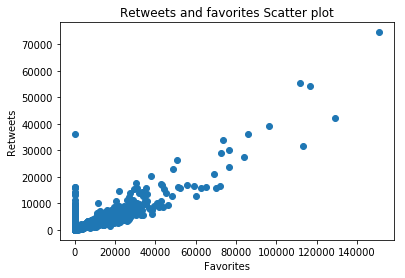

In [90]:
plt.scatter(twitter_archive_master['favorite_count'], twitter_archive_master['retweet_count'])
plt.xlabel("Favorites")
plt.ylabel("Retweets")
plt.title("Retweets and favorites Scatter plot")
fig = plt.gcf()
fig.savefig('retweets-fav-scatter.png',bbox_inches='tight');

#### as shown above there is no corroloation between number of favourites and retweets

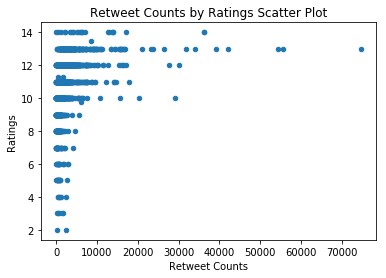

In [91]:
twitter_archive_master.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')
fig = plt.gcf()
fig.savefig('retweets-rating-scatter.png',bbox_inches='tight');

### No correlation between number of retweets and rating

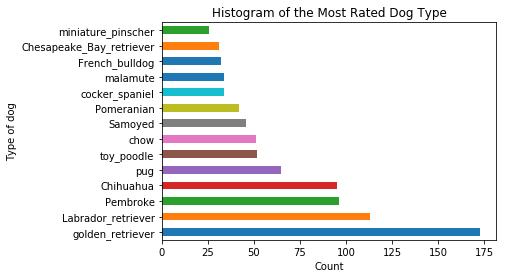

In [92]:
df_dog_type = Image_predictions_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('most-rated-types.png',bbox_inches='tight');

### Most common dog stage

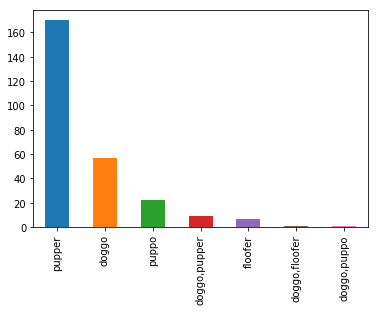

In [93]:
stage_count.plot(kind='bar')
fig = plt.gcf() 
fig.savefig('stage-count',bbox_inches='tight');